<a href="https://colab.research.google.com/github/chaoers/icm2021-2105298-finalist/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# use in jupyter notebook
%matplotlib inline

In [ ]:
# import package
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import ward, fcluster, leaders
from scipy.cluster import hierarchy
from scipy.sparse import csr_matrix
import networkx as nx
import seaborn as sns
import math

sc = StandardScaler()

sns.set_style("ticks")

sns.despine()

<Figure size 432x288 with 0 Axes>

In [ ]:
# const
genre = {'Pop/Rock':0, 'R&B;':1, 'Country':2, 'Jazz':3, 'Vocal':4, 'Latin':5, 'Classical':6, 'Folk':7, 'International':8, 'Blues':9, 'Reggae':10, 'Electronic':11, 'Easy Listening':12, 'Stage & Screen':13, 'Religious': 14, 'Comedy/Spoken':15, 'New Age':16, 'Avant-Garde':17, "Children's": 18, 'Unknown': 19}

In [ ]:
# import data

# file dir
# fullFile = "./data/full_music_data.csv"
influenceFile = "./data/influence_data.csv"
fullFileRes = "./data/full_data.csv"
artistFile = "./data/data_by_artist.csv"

sixGenresFile = './data/6data.csv'

# read data
fullData = pd.read_csv(fullFileRes, dtype = str)
influenceData = pd.read_csv(influenceFile, dtype = str)
artistData = pd.read_csv(artistFile, dtype = str)
sixData = pd.read_csv(sixGenresFile, dtype=str)


In [ ]:
# 重复数据
# fullData[fullData['song_title (censored)'] == 'Better Together']
# fullData[fullData['song_title (censored)'] == 'Fake']

In [ ]:
def cleanData(data):
    # 去重 去unmaned 去nan
    cleaned_data = data.drop_duplicates(keep='first',inplace=False).loc[:, ~data.columns.str.contains("^Unnamed")].dropna(axis=1,how='all').dropna(axis=0, how='any')
    return cleaned_data

In [ ]:
# clean data
fullData = cleanData(fullData)
artistData = cleanData(artistData)
sixData = cleanData(sixData)

fullData_6 = fullData[(fullData['genre'] == 'Pop/Rock') | (fullData['genre'] == 'R&B;') | (fullData['genre'] == 'Country') | (fullData['genre'] == 'Jazz') | (fullData['genre'] == 'Vocal') | (fullData['genre'] == 'Latin')]


In [ ]:
# change to numpy

fullData_np = pd.DataFrame(fullData, columns=fullData.iloc[:, 2:15].columns).drop(columns=['explicit']).to_numpy().astype(float)
artistData_np = artistData.drop(columns=['artist_name', 'artist_id', 'count', 'popularity', 'genre']).to_numpy().astype(float)
sixData_np = sixData.drop(columns=['leibie']).to_numpy().astype(float)

artistData.to_csv('./res/art_clear.csv')
pd.DataFrame(sc.fit_transform(artistData_np)).to_csv('./res/art_fit.csv')

In [ ]:
# 拼接流派数据

# genre_res = pd.DataFrame(index=artistData.index, columns=['genre'])

# for row_index, row in artistData['artist_id'].items():
#     _tem = (influenceData.loc[(influenceData['influencer_id'] == row) | (influenceData['follower_id'] == row)]['influencer_main_genre'])
#     if _tem.shape[0] != 0:
#         genre_res['genre'][row_index] = _tem.iloc[0]
        
# artistData_concated = pd.concat([artistData,genre_res],axis=1)
# artistData_concated.to_csv('./res/artistData_concated.csv')

# genre_res = pd.DataFrame(index=artistData.index, columns=['genre'])

# fullData['artists_id'].astype(str)

# for row_index, row in fullData['artists_id'].items():
#     _tem = (influenceData.loc[(influenceData['influencer_id'] == row) | (influenceData['follower_id'] == row)]['influencer_main_genre'])
#     if _tem.shape[0] != 0:
#         genre_res['genre'][row_index] = _tem.iloc[0]
        
# fullData_concated = pd.concat([fullData,genre_res],axis=1)
# fullData_concated.to_csv('./res/fullData_concated.csv')


In [ ]:
# PCA 主成分分析
def pca(XMat, k):
    m, n = np.shape(XMat)                          # 返回维度 m*n。本处 m*n = 150*4              # axis=0 返回列的平均值。
    data_adjust = sc.fit_transform(XMat)            # 本例对数据进行的是中心化处理（也可以换成标准化）
    covX = np.cov(data_adjust.T)                   # 得到协方差矩阵
                                                   # 为什么要转置呢？转置后生成4*4的的协方差矩阵式，否则150*150。
    eigenValue, eigenVec = np.linalg.eig(covX)     # linear algebra 线性代数, eigen 特征。 |R - lambdaIp| = 0可求得p个特征根，以确定主成分，即 ∑lambda_n_of_all/∑lambda_all >=0.85。
    
    eigValIndice=np.argsort(eigenValue)
    n_eigValIndice=eigValIndice[-1:-(k+1):-1]      #最大的n個特徵值的下標
    n_eigVect=eigenVec[:,n_eigValIndice]
    n_eigVal=eigenValue[n_eigValIndice]
    finalData = np.dot(data_adjust, n_eigVect)
    
    return finalData, n_eigVect, n_eigVal

In [ ]:
# 调用主成分分析

# artistData_np_1 = pd.read_csv('./data.')

art_ver, art_vec, art_val  = pca(artistData_np, 7)

np.savetxt("./res/eigVect.txt",art_vec)
pd.DataFrame(art_ver).to_csv("./res/ver.csv")

# a = art_val

# a = a/sum(a)

# for i in range(1, len(a)):
#     a[i] = a[i] + a[i-1]

# x = np.linspace(1, 12, 12)

# plt.figure(figsize=(9, 6))

# markerline, stemlines, baseline = plt.stem(x, a, '-')

# plt.setp(baseline, color='r', linewidth=2)

# plt.xticks(x)

# plt.xlabel('Principal component')

# plt.ylabel('Influence ratio')

# plt.savefig('./img/PCA_line.jpg', dpi=600)

# plt.show()

In [ ]:
# 主成分分析作图函数

def pca_draw2D(data, n_eigVect, columns=[ 'artist_name','artist_id', 'count', 'popularity', 'genre']):
    for i in range(6):
        _data = sc.fit_transform(np.dot(sc.fit_transform(data[data['genre'] == list (genre.keys()) [list (genre.values()).index (i)]].drop(columns=columns).to_numpy().astype(float)), n_eigVect))
        plt.scatter(_data[:,0], _data[:,1], edgecolor='none',
                alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))

    # plt.xlim((-3, 3))
    # plt.ylim((-3, 3))

def pca_draw3D(data, n_eigVect, columns=[ 'artist_name','artist_id', 'count', 'popularity', 'genre']):
    
    ax = plt.subplot(111, projection='3d')
    for i in range(6):
        _data = sc.fit_transform(np.dot(sc.fit_transform(data[data['genre'] == list (genre.keys()) [list (genre.values()).index(i)]].drop(columns=columns).to_numpy().astype(float)), n_eigVect))
        ax.scatter(_data[:,0], _data[:,1], _data[:,2])
        
    ax.set_zlim(-2, 2)
    plt.xlim((-3, 3))
    plt.ylim((-3, 3))

In [ ]:
# 主成分分析作图
# %matplotlib inline
# pca_draw2D(artistData, eigVect)

# %matplotlib notebook
# pca_draw3D(artistData, eigVect)

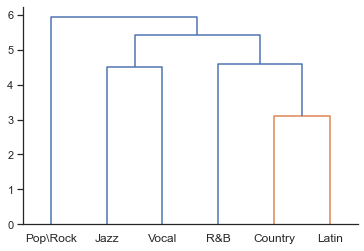

(6, 12)

In [ ]:
# 聚类算法
%matplotlib inline

label_name = np.array(['Country','Jazz','Latin','Pop\Rock','R&B','Vocal'])

cluData = sc.fit_transform(sixData_np)

Z = hierarchy.linkage(cluData, method ='average',metric='euclidean')
hierarchy.dendrogram(Z, labels=label_name)
sns.despine()

plt.savefig('./img/6Data.jpg', dpi=600)
plt.show()

cluData.shape

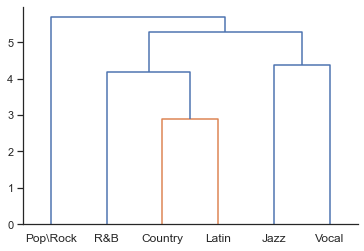

(6, 7)

In [ ]:
%matplotlib inline

label_name = np.array(['Country','Jazz','Latin','Pop\Rock','R&B','Vocal'])
cluData = (np.dot(sc.fit_transform(sixData_np), art_vec))

# ver = sc.fit_transform(artistData_np)

# ver = (np.dot(sc.fit_transform(artistData_np), n_eigVect))

Z = hierarchy.linkage(cluData, method ='average',metric='euclidean')
hierarchy.dendrogram(Z, labels=label_name)

sns.despine()

plt.savefig('./img/6Data_pac.jpg', dpi=600)
plt.show()

cluData.shape

In [ ]:
# 距离矩阵函数
def disArr(ver):
    
    distA=pdist(ver,metric='euclidean')
    # # 将distA数组变成一个矩阵
    distB = squareform(distA)
    
        # 计算组内和组件平均距离
    dis_arr = np.zeros((6, 6))

    for i in range(6):
        for j in range(i+1, 6):
            _row = np.flatnonzero(artistData['genre'] == list (genre.keys()) [list (genre.values()).index (i)])
            _col = np.flatnonzero(artistData['genre'] == list (genre.keys()) [list (genre.values()).index (j)])
            _data = distB[_row, :]
            _data = _data[:, _col]
            dis_sum = np.sum(_data)/(_row.shape[0] * _col.shape[0])
            dis_arr[i, j] = dis_sum

    dis_same = np.zeros((6, 6))
    for i in range(6):
        _row = np.flatnonzero(artistData['genre'] == list (genre.keys()) [list (genre.values()).index (i)])
        _data = distB[_row,:]
        _data = _data[:, _row]
        dis_sum = np.sum(_data)/(_row.shape[0] * _row.shape[0])
        dis_same[i, i] = dis_sum

    dis_arr = pd.DataFrame(dis_same) + pd.DataFrame(dis_arr)
    
    return dis_arr, distB

In [ ]:
# 距离矩阵计算
ver_dis_arr, ver_disB =  disArr(ver)

pd.DataFrame.to_csv(ver_dis_arr, './res/dis_arr_7_dim.csv')

_data_dis = sc.fit_transform(artistData_np)

data_dis_arr, data_disB = disArr(_data_dis)

pd.DataFrame.to_csv(data_dis_arr, './res/dis_arr.csv')


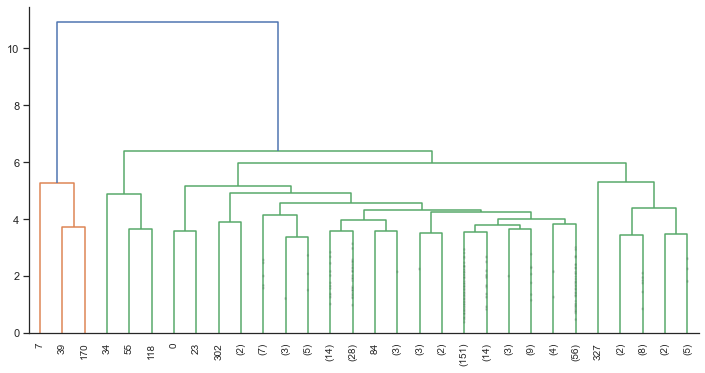

In [ ]:
# 60类聚类
_60_art_data = np.genfromtxt("./data/60_ar.csv", dtype="int")
_70_art_data = np.genfromtxt("./data/70_ar.csv", dtype="int")
_80_art_data = np.genfromtxt("./data/80_ar.csv", dtype="int")

artistData['artist_id'] = artistData['artist_id'].astype('int')

_60_art =  artistData[artistData['artist_id'].isin(_60_art_data)]
_70_art =  artistData[artistData['artist_id'].isin(_70_art_data)]
_80_art =  artistData[artistData['artist_id'].isin(_80_art_data)]

_60_art_np = _60_art.drop(columns=['artist_name', 'artist_id', 'count', 'popularity', 'genre']).to_numpy().astype(float)
_70_art_np = _70_art.drop(columns=['artist_name', 'artist_id', 'count', 'popularity', 'genre']).to_numpy().astype(float)
_80_art_np = _80_art.drop(columns=['artist_name', 'artist_id', 'count', 'popularity', 'genre']).to_numpy().astype(float)

_60_art_np = np.dot(sc.fit_transform(_60_art_np), art_vec)
_70_art_np = np.dot(sc.fit_transform(_70_art_np), art_vec)
_80_art_np = np.dot(sc.fit_transform(_80_art_np), art_vec)

# _60_art_np = sc.fit_transform(_60_art_np)
# _70_art_np = sc.fit_transform(_60_art_np)


plt.figure(figsize=(12, 6))

Z = hierarchy.linkage(_60_art_np, method ='average',metric='euclidean')

hierarchy.dendrogram(Z, leaf_rotation=90., leaf_font_size=10., show_contracted=True, truncate_mode='lastp')

sns.despine()
plt.savefig('./img/60_clu.jpg', dpi = 600)

plt.show()

_60_art.to_csv('./res/_60_art.csv')


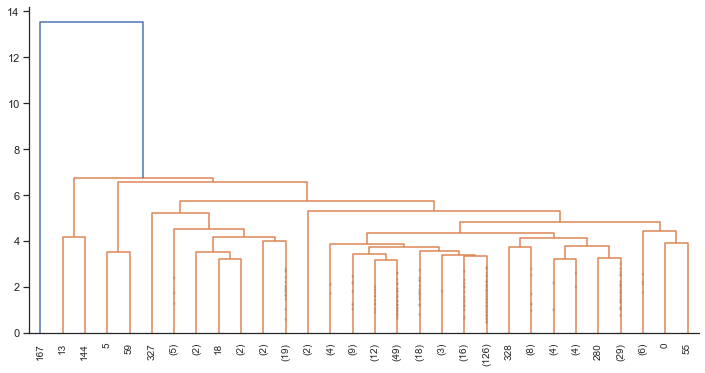

In [ ]:
plt.figure(figsize=(12, 6))

Z = hierarchy.linkage(_70_art_np, method ='average',metric='euclidean')

hierarchy.dendrogram(Z, leaf_rotation=90., leaf_font_size=10., show_contracted=True, truncate_mode='lastp')

sns.despine()
plt.savefig('./img/70_clu.jpg', dpi = 600)

plt.show()

_70_art.to_csv('./res/_70_art.csv')

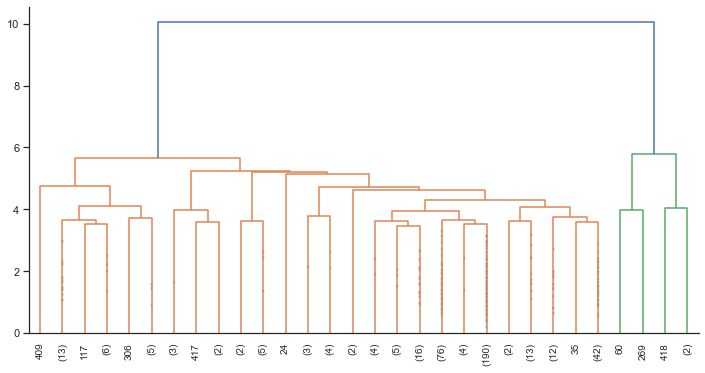

In [ ]:
plt.figure(figsize=(12, 6))

Z = hierarchy.linkage(_80_art_np, method ='average',metric='euclidean')

hierarchy.dendrogram(Z, leaf_rotation=90., leaf_font_size=10., show_contracted=True, truncate_mode='lastp')

sns.despine()
plt.savefig('./img/80_clu.jpg', dpi = 600)

plt.show()

_80_art.to_csv('./res/_80_art.csv')

In [ ]:
T = fcluster(Z, 3, criterion='distance')

T.shape

(331,)

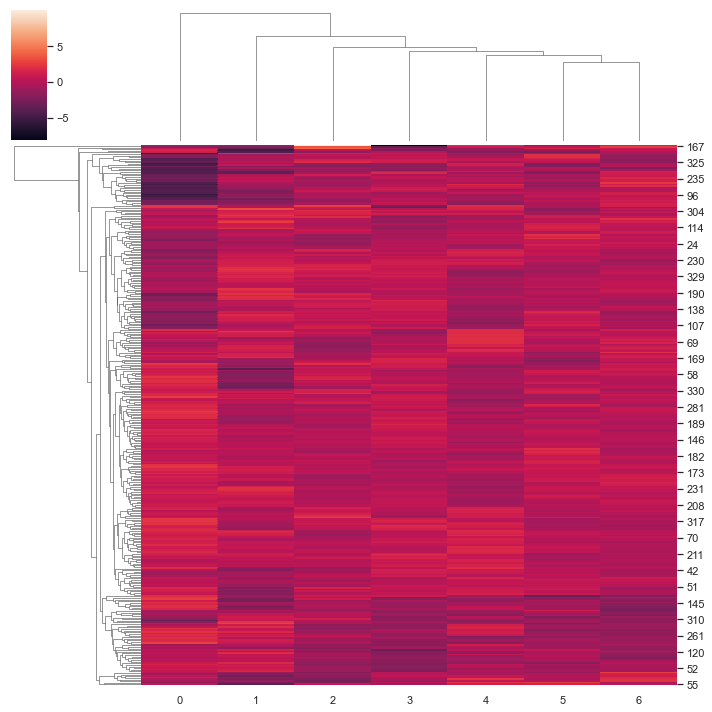

In [ ]:
# 聚类树图



# plt.figure(figsize=(50, 50))
g = sns.clustermap(_70_art_np)
plt.show()

In [ ]:
pd.DataFrame(Z)

,0,1,2,3
0,249.0,250.0,10.993468,2.0
1,56.0,57.0,12.037977,2.0
2,126.0,127.0,13.078023,2.0
3,80.0,81.0,15.981751,2.0
4,296.0,297.0,18.459495,2.0
...,...,...,...,...
325,639.0,649.0,36337.667083,60.0
326,652.0,653.0,43242.932083,139.0
327,654.0,656.0,50085.096573,168.0
328,657.0,658.0,80341.489340,307.0


In [ ]:
# 从此往下为 12类特征展示
he = fullData

fullData_6

,artist_names,artists_id,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity,year,release_date,song_title (censored),genre
0,['James Taylor'],600069,0.472,0.6450,0.6340,110.296,-10.208,1,7,0.3390,0.000004,0.9160,0.0475,0,419733.0,33.0,1993,6/30/1993,How Sweet It Is,Pop/Rock
2,['Roger Waters'],254556,0.395,0.2780,0.0676,135.436,-13.243,1,7,0.2050,0.000013,0.1420,0.0400,0,419693.0,35.0,1984,8/21/1984,4:50AM (Go Fishing),Pop/Rock
3,['DeVotchKa'],207290,0.617,0.3360,0.0393,103.870,-10.661,0,4,0.8620,0.110000,0.4170,0.0363,0,419680.0,45.0,2004,10/5/2004,How It Ends,Pop/Rock
5,['Van Morrison'],307461,0.457,0.4410,0.4610,134.415,-12.817,1,7,0.4640,0.001210,0.1200,0.0298,0,419547.0,31.0,1968,11/1/1968,Ballerina - **** Remaster,Pop/Rock
6,['Peter Frampton'],320845,0.453,0.4990,0.2420,102.410,-8.431,1,0,0.2330,0.000004,0.9840,0.0294,0,419533.0,39.0,1976,1976,Lines On My Face - Live,Pop/Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89352,['Violent Femmes'],922200,0.411,0.7680,0.9610,88.315,-10.737,1,2,0.0557,0.000000,0.3190,0.0744,0,31893.0,26.0,1986,2/12/1986,Old ****** Reagan,Pop/Rock
89354,['Bill Evans Trio'],781423,0.345,0.0329,0.2110,83.541,-41.931,0,10,0.3540,0.016300,0.1090,0.0814,0,30760.0,31.0,1961,1961,discussing repertoire - Bonus Track,Jazz
89355,['Pink Floyd'],346336,0.555,0.0193,0.3090,76.112,-29.867,0,9,0.9170,0.001360,0.0658,0.0432,0,30622.0,50.0,1979,11/30/1979,Stop,Pop/Rock
89356,['Rob Zombie'],235169,0.524,0.6900,0.7840,95.308,-12.459,1,6,0.9860,0.603000,0.4340,0.5620,0,30400.0,36.0,1998,1/1/1998,**** Of The Zombie,Pop/Rock


/usr/local/anaconda3/envs/graph/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/anaconda3/envs/graph/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/anaconda3/envs/graph/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

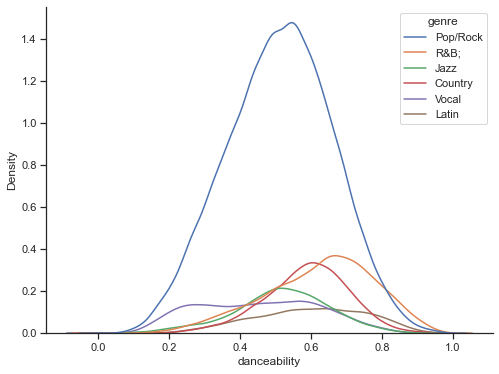

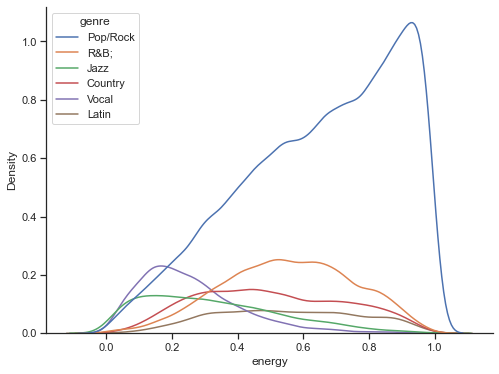

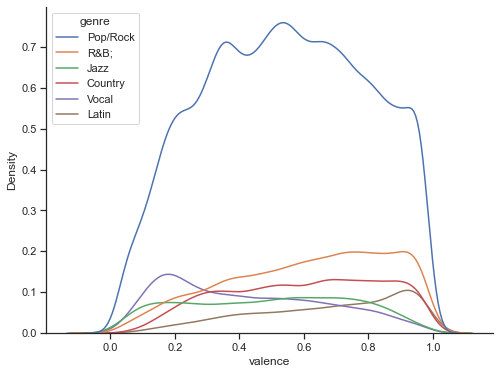

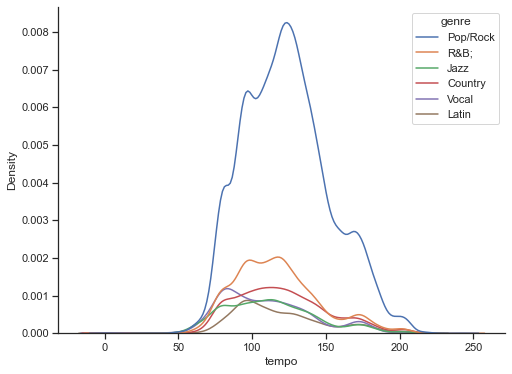

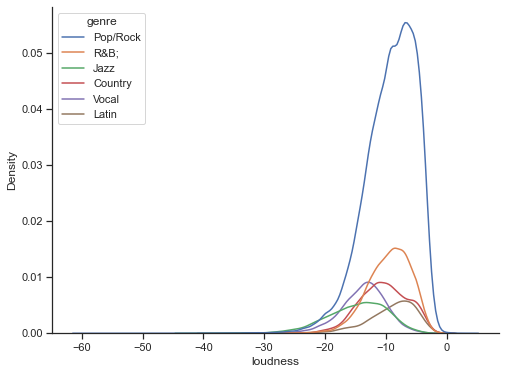

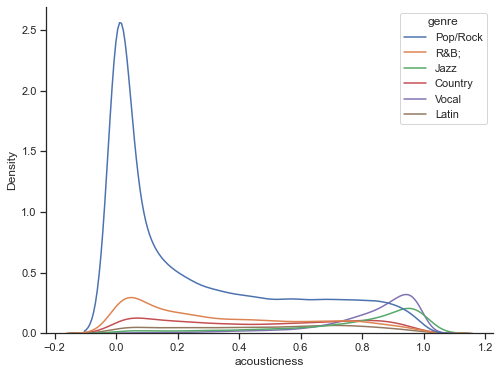

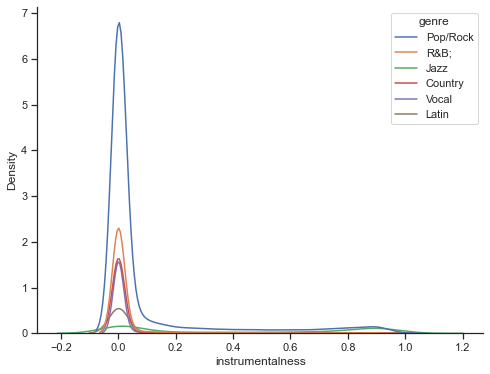

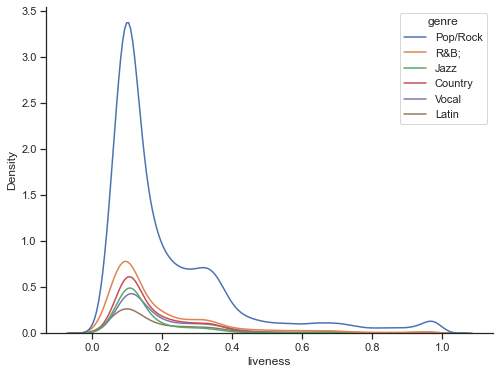

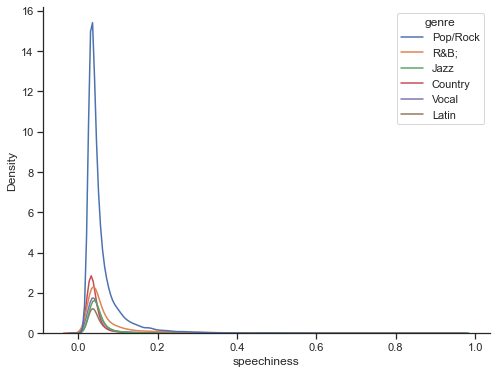

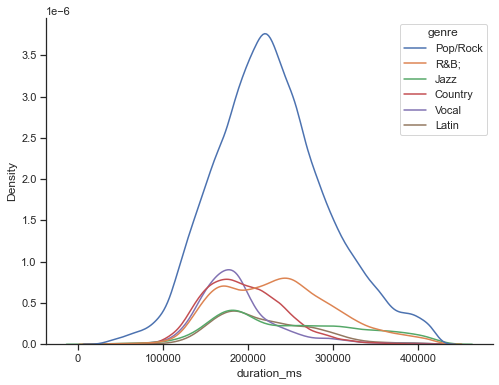

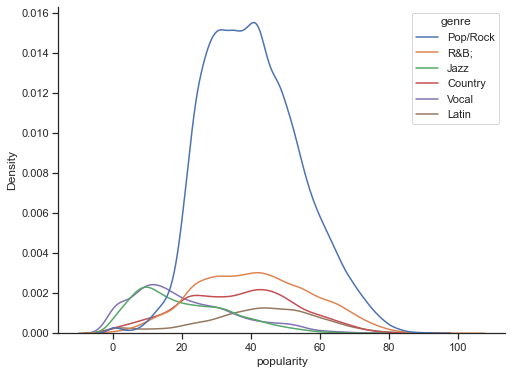

In [ ]:
fullData_6['danceability'] = fullData_6['danceability'].astype('float')

plt.figure(figsize=(8, 6))


sns.kdeplot(
   data=fullData_6, x='danceability', hue='genre',
#    fill=True, common_norm=False, palette="bright",
#    alpha=.2, linewidth=0,
)
sns.despine()
plt.savefig('./img/danceability.jpg', dpi=600)

plt.figure(figsize=(8, 6))

fullData_6['energy'] = fullData_6['energy'].astype('float')


sns.kdeplot(

   data=fullData_6, x='energy', hue='genre',
#     fill=True, common_norm=False, palette="crest",
#    alpha=.3, linewidth=0,
)
sns.despine()
plt.savefig('./img/energy.jpg', dpi=600)

fullData_6['valence'] = fullData_6['valence'].astype('float')

plt.figure(figsize=(8, 6))

sns.kdeplot(
   data=fullData_6, x='valence', hue='genre',
#    fill=True, common_norm=False, palette="crest",
#    alpha=.3, linewidth=0,
)
sns.despine()
plt.savefig('./img/valence.jpg', dpi=600)

fullData_6['tempo'] = fullData_6['tempo'].astype('float')

plt.figure(figsize=(8, 6))

sns.kdeplot(
   data=fullData_6, x='tempo', hue='genre',
#    fill=True, common_norm=False, palette="crest",
#    alpha=.3, linewidth=0,
)
sns.despine()
plt.savefig('./img/tempo.jpg', dpi=600)


fullData_6['loudness'] = fullData_6['loudness'].astype('float')

plt.figure(figsize=(8, 6))

sns.kdeplot(
   data=fullData_6, x='loudness', hue='genre',
#    fill=True, common_norm=False, palette="crest",
#    alpha=.4, linewidth=0,
)
sns.despine()
plt.savefig('./img/loudness.jpg', dpi=600)

fullData_6['acousticness'] = fullData_6['acousticness'].astype('float')

plt.figure(figsize=(8, 6))

sns.kdeplot(
   data=fullData_6, x='acousticness', hue='genre',
#    fill=True, common_norm=False, palette="crest",
#    alpha=.4, linewidth=0,
)
sns.despine()
plt.savefig('./img/acousticness.jpg', dpi=600)

fullData_6['instrumentalness'] = fullData_6['instrumentalness'].astype('float')

plt.figure(figsize=(8, 6))

sns.kdeplot(
   data=fullData_6, x='instrumentalness', hue='genre',
#    fill=True, common_norm=False, palette="bright",
#    alpha=.4, linewidth=0,
)
sns.despine()
plt.savefig('./img/instrumentalness.jpg', dpi=600)

fullData_6['liveness'] = fullData_6['liveness'].astype('float')

plt.figure(figsize=(8, 6))

sns.kdeplot(
   data=fullData_6, x='liveness', hue='genre',
#    fill=True, common_norm=False, palette="crest",
#    alpha=.4, linewidth=0,
)
sns.despine()
plt.savefig('./img/liveness.jpg', dpi=600)

fullData_6['speechiness'] = fullData_6['speechiness'].astype('float')

plt.figure(figsize=(8, 6))

sns.kdeplot(
   data=fullData_6, x='speechiness', hue='genre',
#    fill=True, common_norm=False, palette="crest",
#    alpha=.4, linewidth=0,
)
sns.despine()
plt.savefig('./img/speechiness.jpg', dpi=600)

fullData_6['duration_ms'] = fullData_6['duration_ms'].astype('float')

plt.figure(figsize=(8, 6))

sns.kdeplot(
   data=fullData_6, x='duration_ms', hue='genre',
#    fill=True, common_norm=False, palette="crest",
#    alpha=.4, linewidth=0,
)
sns.despine()
plt.savefig('./img/duration_ms.jpg', dpi=600)

fullData_6['popularity'] = fullData_6['popularity'].astype('float')

plt.figure(figsize=(8, 6))

sns.kdeplot(
   data=fullData_6, x='popularity', hue='genre',
#    fill=True, common_norm=False, palette="crest",
#    alpha=.4, linewidth=0,
)
sns.despine()
plt.savefig('./img/popularity.jpg', dpi=600)




In [ ]:
# 计算网络图邻接矩阵
graph = np.zeros((influenceData.shape[0], 2))

minYear = int(min(min(influenceData['influencer_active_start']), min(influenceData['follower_active_start'])))

minYear

maxYear = int(max(max(influenceData['influencer_active_start']), max(influenceData['follower_active_start'])))

for row_index, row  in influenceData.iterrows():
    # print(row_index, row['influencer_main_genre'])
    
    graph[row_index][0] = genre[row['influencer_main_genre']] + int((int(row['influencer_active_start']) - minYear)/10)* 20
    graph[row_index][1] = genre[row['follower_main_genre']] + int((int(row['follower_active_start']) - minYear)/10) * 20


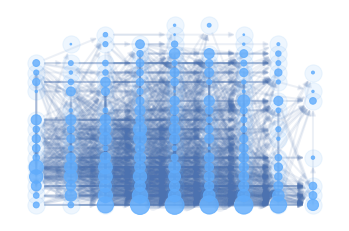

In [ ]:
# 通过邻接矩阵作图
%matplotlib inline
graph = graph.astype(int)

G = nx.Graph()

G.clear()

row = np.array(graph[:, 0])
col = np.array(graph[:, 1])

data = np.ones((1, graph.shape[0])).reshape(-1)

n = max(max(row), max(col)) + 1

pos = {}

for i in range((maxYear - minYear + 10)*2):
    pos[i] = (i // 20, i % 20)

A = csr_matrix((data, (row, col)), shape=(n, n)).toarray()

A = np.where(A < 0, 0, A).astype('int')

G = nx.from_numpy_matrix(A, create_using=nx.DiGraph()) 

_be_d = dict(G.degree)

G.remove_nodes_from(list(nx.isolates(G)))

# G = G.to_directed()

color_list = [float(v['weight']*0.5) for (r,c,v) in G.edges(data=True)]

color_list = [int(((i/max(color_list))*8 + 2)) for i in color_list]

d = dict(G.degree)

plt.figure(figsize=(15, 6))


plt.axis("off")
# nx.draw(G, pos, node_color="#A0CBE2", edge_color="#aaaaaa")
nx.draw(G,
        pos,
        width=color_list,
        node_color="#60acfc",
        edge_color = 'b',
        alpha = 0.1
       )
nx.draw_networkx_nodes(G,pos, node_color="#60acfc",node_size=[v * 3 for v in d.values()], alpha=0.8)

plt.savefig('./img/all_network.jpg', dpi = 600)

plt.show() 


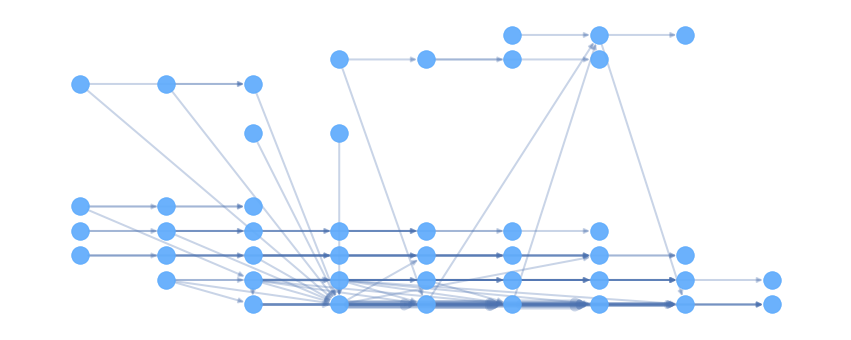

In [ ]:
# 通过邻接矩阵作图
%matplotlib inline
graph = graph.astype(int)

G = nx.Graph()

G.clear()

row = np.array(graph[:, 0])
col = np.array(graph[:, 1])

data = np.ones((1, graph.shape[0])).reshape(-1)

n = max(max(row), max(col)) + 1

pos = {}

for i in range((maxYear - minYear + 10)*2):
    pos[i] = (i // 20, i % 20)

A = csr_matrix((data, (row, col)), shape=(n, n)).toarray()

A = np.where(A < 50, 0, A).astype('int')

G = nx.from_numpy_matrix(A, create_using=nx.DiGraph()) 

_be_d = dict(G.degree)

G.remove_nodes_from(list(nx.isolates(G)))

# G = G.to_directed()

color_list = [float(v['weight']*0.5) for (r,c,v) in G.edges(data=True)]

color_list = [int(((i/max(color_list))*8 + 2)) for i in color_list]

# d = dict(G.degree)

# plt.figure(figsize=(15, 6))


plt.axis("off")
# nx.draw(G, pos, node_color="#A0CBE2", edge_color="#aaaaaa")
nx.draw(G,
        pos,
        width=color_list,
        node_color="#60acfc",
        edge_color = 'b',
        alpha = 0.3
       )
nx.draw_networkx_nodes(G,pos, node_color="#60acfc",
#                        node_size=[v * 3 for v in d.values()],
                       alpha=0.9
                      )

plt.savefig('./img/all_network_50.jpg', dpi = 600)

plt.show() 


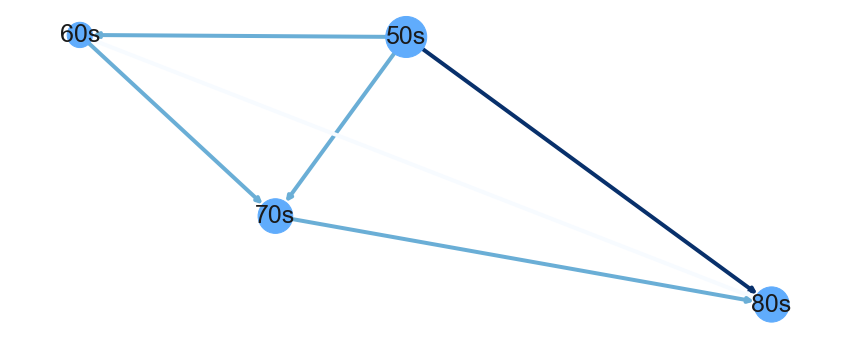

In [ ]:
# subnet
# sublist = []

# for i in range(6):
#     for j in range(9):
#         sublist.append(j*10+i)
        
# sub_A = np.zeros((54, 54))
        
# for i in range(len(sublist)):
#     for j in range(len(sublist)):
#         sub_A[i, j] = A[sublist[i], sublist[j]]
        
# pos_sub = {}

# for i in range(54):
#     pos_sub[i] = (i // 6, i % 6)

sublist = [65, 85, 105, 125]

# sublist = [60, 80, 100, 120]
sub_A = np.zeros((4, 4))

# pos_sub = [(0,0), (1,0), (2,0),(3,0)]

for i in range(len(sublist)):
    for j in range(len(sublist)):
        sub_A[i, j] = A[sublist[i], sublist[j]]

G_sub = nx.from_numpy_matrix(sub_A, create_using=nx.DiGraph()) 

G_sub.remove_nodes_from(list(nx.isolates(G_sub)))

# G_sub = G_sub.to_directed()

color_list = [float(v['weight']*0.5) for (r,c,v) in G_sub.edges(data=True)]

color_list = [int(((i/max(color_list))*2 + 2)) for i in color_list]

d_sub = {k:v for k,v in d.items() if k in sublist}

plt.figure(figsize=(15, 6))

label = {0: '50s', 1:'60s', 2:'70s', 3:'80s'}

# label = {0: '60s', 1:'70s', 2:'80s', 3:'90s'}

plt.axis("off")
# nx.draw(G, pos, node_color="#A0CBE2", edge_color="#aaaaaa")
nx.draw(G_sub,
#         pos = pos,
        width=4,
        node_color="#60acfc",
        edge_color =color_list,
        edge_cmap=plt.cm.Blues,
#         alpha = 0.5,
        node_size=[v * 40 for v in d_sub.values()],
#         with_labels = False,
        labels = label,
        font_size = 25,
       )
# pos = nx.spring_layout(G_sub)
# for p in pos:  # raise text positions
#     pos[p][1] += 0
# nx.draw_networkx_labels(G_sub, pos,
# #         alpha = 0.5,
# #         with_labels = False,
#         labels = label,
#         font_size = 20,)
# nx.draw_networkx_nodes(G_sub,pos = pos_sub, node_color="#60acfc",node_size=[v * 3 for v in d_sub.values()], alpha=0.8)

plt.savefig('./img/all_network_local_jazz.jpg', dpi = 600)

plt.show() 
# G = nx.Graph()

# G.clear()

# row = np.array(graph[:, 0])
# col = np.array(graph[:, 1])

# data = np.ones((1, graph.shape[0])).reshape(-1)

# n = max(max(row), max(col)) + 1

# pos = {}

# for i in range((maxYear - minYear + 10)*2):
#     pos[i] = (i // 20, i % 20)

# A = csr_matrix((data, (row, col)), shape=(n, n)).toarray()

# A = np.where(A < 0, 0, A).astype('int')

# G = nx.from_numpy_matrix(A) 

# G.remove_nodes_from(list(nx.isolates(G)))

# G = G.to_directed()

# color_list = [float(v['weight']*0.5) for (r,c,v) in G.edges(data=True)]

# color_list = [int(((i/max(color_list))*8 + 2)) for i in color_list]

# d = dict(G.degree)

# plt.figure(figsize=(15, 6))


# plt.axis("off")
# # nx.draw(G, pos, node_color="#A0CBE2", edge_color="#aaaaaa")
# nx.draw(G,
#         pos,
#         width=color_list,
#         node_color="#60acfc",
#         edge_color = 'b',
#         alpha = 0.1
#        )
# nx.draw_networkx_nodes(G,pos, node_color="#60acfc",node_size=[v * 3 for v in d.values()], alpha=0.8)

# # plt.savefig('./img/all_network.jpg', dpi = 600)

# plt.show() 

In [ ]:
# pos = nx.spring_layout(G_sub)

In [ ]:
# 将fullData 通过不同年份和不同流派分割
minYear = int(min(fullData['year']))

minYear = round(minYear/10)*10

maxYear = int(max(fullData['year']))

maxYear = math.ceil(maxYear/10)*10

fullData['year'] = fullData['year'].astype('int')

# 正常数据
for i in range(6):
    
    _table = pd.DataFrame(columns=fullData.iloc[:, 2:17].columns).drop(columns=['explicit'])
    
    for j in range(int((maxYear - minYear)/10)):
        _data = fullData[(fullData['genre'] == list (genre.keys()) [list (genre.values()).index (i)]) & (fullData['year'] >= minYear + j * 10) & (fullData['year'] < minYear + (j+1) * 10)].iloc[:, 2:17].drop(columns=['explicit'])
        a = _data.astype('float').mean()
        a['year'] = minYear + j * 10
        _table = _table.append(a, ignore_index=True)
    
    pd.DataFrame(sc.fit_transform(_table)).to_csv("./res/"+ list(genre.keys()) [list (genre.values()).index (i)][0:3]+".csv")

_table = pd.DataFrame(columns=fullData.iloc[:, 2:15].columns).drop(columns=['explicit'])
    
for j in range(int((maxYear - minYear))):
    _data = fullData[(fullData['genre'] == list (genre.keys()) [list (genre.values()).index (0)]) & (fullData['year'] == minYear + j) ].iloc[:, 2:17].drop(columns=['explicit'])
    a = _data.astype('float').mean()
    a = a 
    a['year'] = minYear + j
    _table = _table.append(a, ignore_index=True)

pd.DataFrame(sc.fit_transform(_table)).to_csv("./res/"+ list(genre.keys()) [list (genre.values()).index (0)][0:3]+"_1.csv")

# 降维数据
full_ver, full_n_eigVect, full_eigInd = pca(fullData_np, 7)

N_ei = pd.DataFrame(full_n_eigVect)

all_table_7 = pd.DataFrame(columns=fullData.iloc[:, 2:15].columns).drop(columns=['explicit'])

for i in range(6):
    
    _table_7 = pd.DataFrame(columns=fullData.iloc[:, 2:15].columns).drop(columns=['explicit'])
    
    for j in range(int((maxYear - minYear)/10)):
        _data = fullData[(fullData['genre'] == list (genre.keys()) [list (genre.values()).index (i)]) & (fullData['year'] >= minYear + j * 10) & (fullData['year'] < minYear + (j+1) * 10)].iloc[:, 2:15].drop(columns=['explicit'])
        a = _data.astype('float').mean()
        _table_7 = _table_7.append(a, ignore_index=True)
        
    pd.DataFrame(sc.fit_transform(np.dot(sc.fit_transform(_table_7.to_numpy()), full_n_eigVect))).to_csv("./res/"+ list(genre.keys()) [list (genre.values()).index (i)][0:3]+"_7_dim.csv")

    _table_7['genre'] = list (genre.keys()) [list (genre.values()).index (i)]
    all_table_7 = all_table_7.append(_table_7, ignore_index=True)
    
_table_7 = pd.DataFrame(columns=fullData.iloc[:, 2:15].columns).drop(columns=['explicit'])
    
for j in range(int((maxYear - minYear))):
    _data = fullData[(fullData['genre'] == list (genre.keys()) [list (genre.values()).index (2)]) & (fullData['year'] == minYear + j) ].iloc[:, 2:15].drop(columns=['explicit'])
    a = _data.astype('float').mean()
    _table_7 = _table_7.append(a, ignore_index=True)
pd.DataFrame(sc.fit_transform(np.dot(sc.fit_transform(_table_7.to_numpy()), full_n_eigVect))).to_csv("./res/"+ list(genre.keys()) [list (genre.values()).index (2)][0:3]+"_1_7_dim.csv")



In [ ]:
# def show_label(id):
#     return all_table_7['genre'][id]

all_table_7



,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,genre
0,0.521000,0.539000,0.806000,93.412000,-9.161000,1.000000,4.000000,0.969000,0.000575,0.946000,0.508000,180813.000000,Pop/Rock
1,0.515417,0.236492,0.498333,122.984917,-13.324333,0.666667,4.583333,0.835250,0.001619,0.135317,0.062542,171336.250000,Pop/Rock
2,0.451245,0.383423,0.587196,113.532061,-11.785092,0.673469,4.846939,0.722436,0.043085,0.201861,0.043654,157314.704082,Pop/Rock
3,0.567190,0.490494,0.694819,116.112452,-10.721070,0.871194,4.564403,0.699402,0.047068,0.185367,0.064908,146533.978923,Pop/Rock
4,0.498927,0.531609,0.607302,119.488516,-10.792562,0.804680,5.230063,0.455446,0.096150,0.208300,0.051779,181579.672547,Pop/Rock
5,0.507148,0.572133,0.574977,122.916870,-10.948139,0.783825,5.035208,0.330464,0.091945,0.229683,0.054438,231630.796801,Pop/Rock
6,0.516400,0.695698,0.558150,125.228821,-9.855097,0.718622,5.275769,0.176077,0.103695,0.221951,0.057817,239079.052089,Pop/Rock
7,0.497959,0.695703,0.498565,123.119328,-8.622901,0.753336,5.235184,0.176091,0.105813,0.212507,0.060861,242311.687760,Pop/Rock
8,0.511849,0.745675,0.486379,126.811717,-6.264852,0.693629,5.244524,0.164371,0.067677,0.201462,0.065322,232524.928991,Pop/Rock
9,0.548671,0.692546,0.457927,123.210739,-6.355927,0.679581,5.204186,0.204393,0.047632,0.188258,0.067095,229852.601527,Pop/Rock


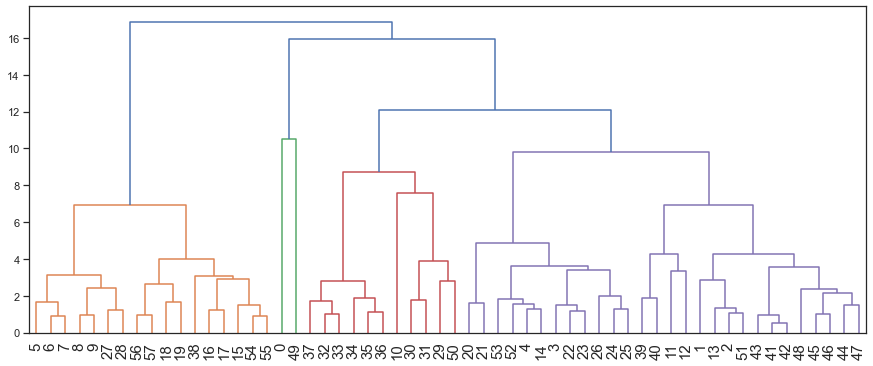

In [ ]:
# all_table 聚类

all_table_7 = all_table_7.dropna(how = 'any')

all_table_7_np = all_table_7.drop(columns=['genre']).to_numpy().astype('float')

all_table_7_np = sc.fit_transform(all_table_7_np)

# Convert the palette to vectors that will be drawn on the side of the matrix
# networks = df.columns.get_level_values("network")
# network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# g = sns.clustermap(all_table_7_np, cmap="mako",
#                    col_cluster = False,
#                    figsize=(20, 20),
#                    standard_scale=1
# #                    row_colors=network_colors, col_colors=network_colors,
# #                    dendrogram_ratio=(.1, .2),
# #                    cbar_pos=(.02, .32, .03, .2),
# #                    linewidths=.75, figsize=(12, 13)
#                   )

plt.figure(figsize=(15, 6))

Z = hierarchy.linkage(all_table_7_np, method ='ward',metric='euclidean')

hierarchy.dendrogram(Z, show_leaf_counts=True, leaf_font_size=15., show_contracted=True)

plt.savefig('./img/all_table.jpg', dpi=600)

plt.show()

# _60_art.to_csv('./res/_60_art.csv')

In [ ]:
all_table_7

,danceability,energy,valence,tempo,loudness,mode,key,acousticness,instrumentalness,liveness,speechiness,duration_ms,genre
0,0.521000,0.539000,0.806000,93.412000,-9.161000,1.000000,4.000000,0.969000,0.000575,0.946000,0.508000,180813.000000,Pop/Rock
1,0.515417,0.236492,0.498333,122.984917,-13.324333,0.666667,4.583333,0.835250,0.001619,0.135317,0.062542,171336.250000,Pop/Rock
2,0.451245,0.383423,0.587196,113.532061,-11.785092,0.673469,4.846939,0.722436,0.043085,0.201861,0.043654,157314.704082,Pop/Rock
3,0.566512,0.489986,0.693794,116.193521,-10.731935,0.871495,4.563084,0.698127,0.048836,0.185166,0.064854,147290.542056,Pop/Rock
4,0.494863,0.530637,0.599306,119.554426,-10.853307,0.800730,5.236449,0.451308,0.100582,0.211686,0.052139,194859.058548,Pop/Rock
5,0.499818,0.574119,0.564815,122.959402,-10.954580,0.778732,5.037366,0.324428,0.098597,0.235615,0.054896,253905.176260,Pop/Rock
6,0.513330,0.695484,0.552435,125.157724,-9.863911,0.715267,5.288990,0.175247,0.107701,0.226658,0.058211,248441.383417,Pop/Rock
7,0.494297,0.692996,0.492360,122.875432,-8.672573,0.752276,5.236828,0.176460,0.108770,0.216985,0.060831,253512.755172,Pop/Rock
8,0.508897,0.744869,0.482829,126.815407,-6.289298,0.691255,5.255937,0.164358,0.070975,0.202643,0.065348,239706.600866,Pop/Rock
9,0.547487,0.691477,0.456553,123.091999,-6.395948,0.677275,5.200168,0.205182,0.050137,0.189002,0.067016,233286.387214,Pop/Rock


In [ ]:
# only year 7dim
_table_7 = pd.DataFrame(columns=fullData.iloc[:, 2:15].columns).drop(columns=['explicit'])

# for j in range(int((maxYear - minYear))):
#     _data = fullData[(fullData['year'] == minYear + j) ].iloc[:, 2:15].drop(columns=['explicit'])
#     a = _data.astype('float').mean()
#     _table_7 = _table_7.append(a, ignore_index=True)
# pd.DataFrame(sc.fit_transform(np.dot(sc.fit_transform(_table_7.to_numpy()), n_eigVect))).to_csv("./res/only_year_1_7_dim.csv")

for j in range(int((maxYear - minYear))):
    _data = fullData[(fullData['year'] == minYear + j) ].iloc[:, 2:17].drop(columns=['explicit'])
    a = _data.astype('float').mean()
    _table_7 = _table_7.append(a, ignore_index=True)
pd.DataFrame(sc.fit_transform(_table_7)).to_csv("./res/only_year_1.csv")

minYear
maxYear

2020

In [ ]:


rock_song = pd.read_csv('./data/rock_song.csv')

# rock_ver , rock_vec, rock_val = pca(rock_song.to_numpy(), 4)

data_adjust = sc.fit_transform(rock_song)            # 本例对数据进行的是中心化处理（也可以换成标准化）
covX = np.cov(data_adjust.T)               # 得到协方差矩阵

ex = [[1,0.010185,0.271348],[0.010185,1,0.319343],[0.271348,0.319343,1]]

np.linalg.eig(ex)


(array([1.42411708, 0.98994875, 0.58593416]),
 array([[-0.46265503, -0.76210459, -0.45293146],
        [-0.54032732,  0.64744201, -0.53746184],
        [-0.70284899,  0.00392818,  0.71132824]]))

In [ ]:
eigenValue, eigenVec = np.linalg.eig(ex)

eigValIndice=np.argsort(eigenValue)
n_eigValIndice=eigValIndice[-1:-(4+1):-1]      #最大的n個特徵值的下標
n_eigVect=eigenVec[:,n_eigValIndice]
n_eigVal=eigenValue[n_eigValIndice]
n_eigValIndice

n_eigVal

n_eigVect

array([[ 0.52970355,  0.48795453, -0.18454054, -0.66877555],
       [ 0.59637358,  0.24626526, -0.25146339,  0.7214269 ],
       [ 0.30606622, -0.7715264 , -0.52979752, -0.1743137 ],
       [ 0.51968853, -0.32557765,  0.78868596, -0.04355718]])

In [ ]:
eigVal

NameError: name 'eigVal' is not defined

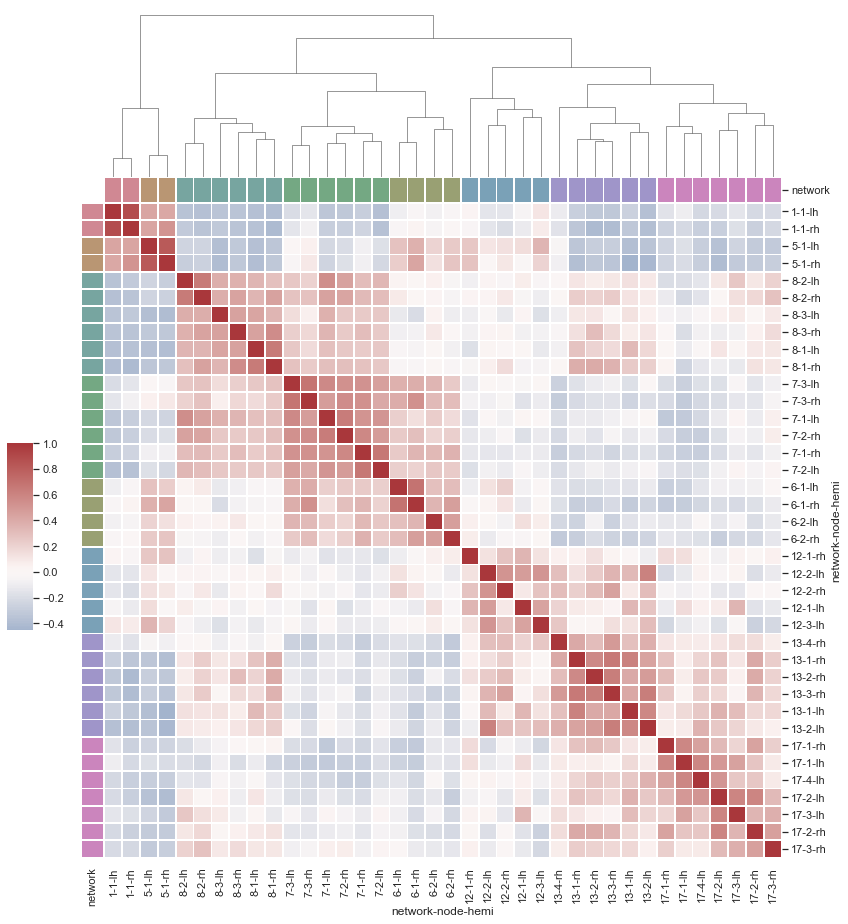

In [ ]:
import pandas as pd
import seaborn as sns
sns.set_theme()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

In [ ]:
df

network           1                     5                     6             \
node              1                     1                     1              
hemi             lh         rh         lh         rh         lh         rh   
0         56.055744  92.031036 -35.898861  -1.889181   5.898688 -43.692322   
1         55.547253  43.690075  19.568010  15.902983 -23.231823 -10.745867   
2         60.997768  63.438793  19.247454  37.209419   2.392153  16.509109   
3         18.514868  12.657158  32.896915  11.199619 -14.665752   2.073715   
4         -2.527392 -63.104668  18.396759   3.219077 -41.856911 -24.690414   
..              ...        ...        ...        ...        ...        ...   
915       -7.429513  -4.813219   0.017912 -25.305094 -75.461159 -70.289261   
916      -33.554138 -38.605621 -32.935612 -21.783203 -16.198238 -34.893780   
917      -78.539566 -74.197189 -32.800556 -37.021500   2.098941 -18.581594   
918     -103.235825 -98.744286 -14.330512 -17.224781  -3.007454 -42.672840   
919      -36.288868 -10.762070  26.558777  21.377319   9.652065  12.693388   

network                                7             ...         13  \
node             2                     1             ...          2   
hemi            lh         rh         lh         rh  ...         rh   
0       -47.664265  12.284122   1.566538 -13.042585  ...  14.738475   
1        10.269546  31.275831 -26.309488 -18.077026  ...  23.792282   
2        -5.314236   2.372976  -7.342168 -24.550989  ...   8.968520   
3        32.634335  45.825409 -47.632999  -6.580215  ...  19.627728   
4       -33.975418 -24.149668  -6.315651 -29.344135  ...  55.853088   
..             ...        ...        ...        ...  ...        ...   
915     -13.119029  -5.194376 -56.022263 -24.290606  ... -19.436220   
916      16.504656  13.005379  26.230785   4.764211  ...  16.711153   
917      11.386637   3.676295  52.871113  -3.970096  ...  45.261150   
918       1.581095 -38.023777  37.736561   4.872248  ...  33.483253   
919     -24.773617 -62.247086  -4.883728 -49.077343  ...  -8.466401   

network                               17                                   \
node             3          4          1                     2              
hemi            rh         rh         lh         rh         lh         rh   
0       -16.853010 -34.217819 -21.734550   1.028253   7.791784  68.903725   
1         8.927007 -19.732401 -13.035799  46.381824 -15.752450  31.000332   
2         1.413584  -4.955075  26.033442  34.212200   1.326110 -22.580757   
3        49.208748   1.661293  55.297466   4.255006  -2.420144  12.098393   
4        46.737320   4.586625  43.067562  52.219875  28.232882 -11.719750   
..             ...        ...        ...        ...        ...        ...   
915      15.894722  22.195951  76.179489  51.934669  -6.614513  -6.690762   
916      17.339653  13.682954  50.962399  13.696922  63.503616  57.401176   
917      37.007389  29.753304  43.800747   8.144480  47.281460  70.499649   
918      37.434860 -14.403917  46.674419  40.954796   0.877180  37.577152   
919      23.855883  48.888733 -12.229620  -6.596726  17.665163  16.153173   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  
..             ...         ...        ...  
915      22.893030   48.274380  76.228455  
916      24.974548   51.972153  64.538788  
917      66.994400   81.539246  64.969772  
918      20.517746    3.124434  56.718388  
919       8.300399   33.687531  17.960655  

[920 rows x 38 columns]

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

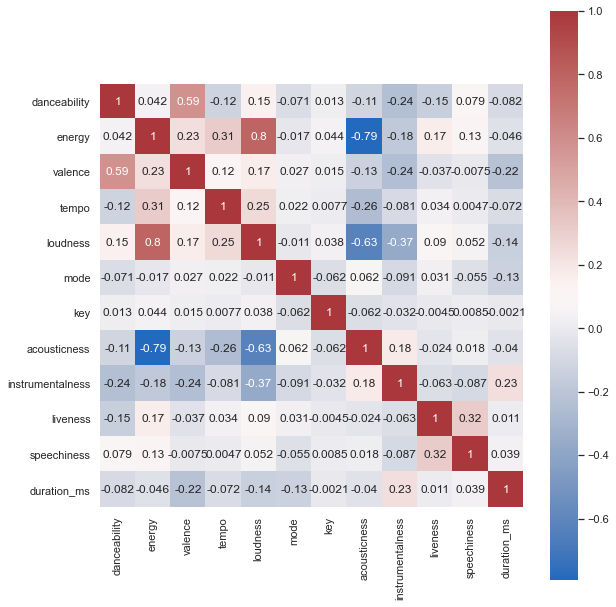

In [ ]:
sns.set_theme(style="whitegrid")

a = np.loadtxt('./data/相关系数.txt')
a = pd.DataFrame(a)
a.index = artistData.drop(columns=['artist_name', 'artist_id', 'count', 'popularity', 'genre']).columns
a.columns = a.index

plt.figure(figsize=(9,9))

g = sns.heatmap(data = a, cmap="vlag", square=True, annot=True)

plt.tight_layout()

plt.savefig('./img/相关系数.jpg', dpi = 600)